In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.10.0


**Import the Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test, y_test) = fashion_mnist.load_data()

**EXPLORE THE DATA

In [4]:
x_train.shape #there are 60,000 images in the training set, with each image represented as 28x28 pixels
#each pixel have values between 0 and 255

(60000, 28, 28)

In [10]:
y_train.shape #there are 60,000 labels in the training set

(60000,)

In [11]:
y_train #each label is an integre between 0 and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','shirt','sneaker','bag','ankle boot']

In [12]:
x_test.shape #there are 10 000 images in the test set, each image is represented as 28x28 pixels

(10000, 28, 28)

**PREPROCESS THE DATA

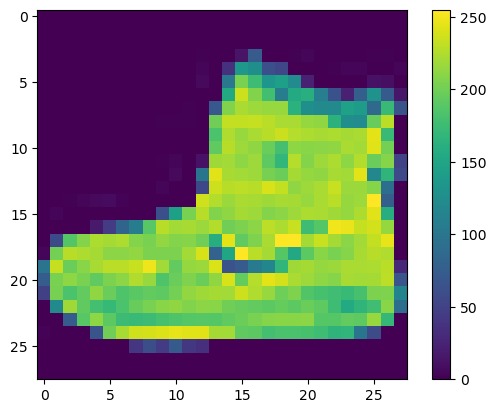

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
#scale these values of each pixels to a range of 0 to 1
x_train = x_train/255
x_test = x_test/255

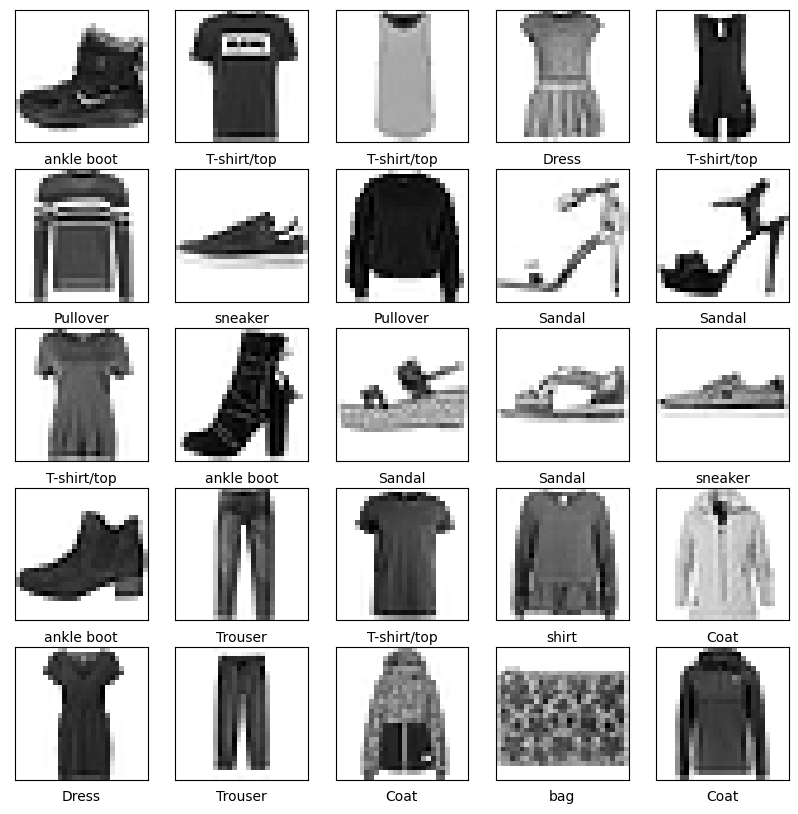

In [6]:
#to verify that the data is in the correct format, we show the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**BUILD THE MODEL

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#this layer transform the format of images (28x28=784 pixels)
    tf.keras.layers.Dense(128, activation='relu'),#128 neuronas
    tf.keras.layers.Dense(10)
])

**COMPILE THE MODEL

In [10]:
model.compile(optimizer='adam',#adaptive stochastic gradient descent method that adjusts the learning rate based on training progress
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#sparse categorical cross-entropy, which is a suitable function for multiclass 
              #classification problems with integer labels.
              metrics=['accuracy'])

**Train the model

In [12]:
#we take data for do the validation, the advice is use the 10% or 20% of your data of training
x_val = x_train[:6000]
partial_x_train = x_train[6000:]
y_val = y_train[:6000]
partial_y_train = y_train[6000:]


In [13]:
#we fit our model to data
history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size =64, validation_data = (x_val, y_val) )

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.5248 - accuracy: 0.8168 - val_loss: 0.4353 - val_accuracy: 0.8462
Epoch 2/10
844/844 [==============================] - 1s 2ms/step - loss: 0.3905 - accuracy: 0.8598 - val_loss: 0.3870 - val_accuracy: 0.8547
Epoch 3/10
844/844 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.8738 - val_loss: 0.3593 - val_accuracy: 0.8672
Epoch 4/10
844/844 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8812 - val_loss: 0.3654 - val_accuracy: 0.8635
Epoch 5/10
844/844 [==============================] - 1s 2ms/step - loss: 0.3052 - accuracy: 0.8893 - val_loss: 0.3496 - val_accuracy: 0.8728
Epoch 6/10
844/844 [==============================] - 1s 2ms/step - loss: 0.2916 - accuracy: 0.8923 - val_loss: 0.3149 - val_accuracy: 0.8833
Epoch 7/10
844/844 [==============================] - 1s 2ms/step - loss: 0.2777 - accuracy: 0.8981 - val_loss: 0.3047 - val_accuracy: 0.8897
Epoch 

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

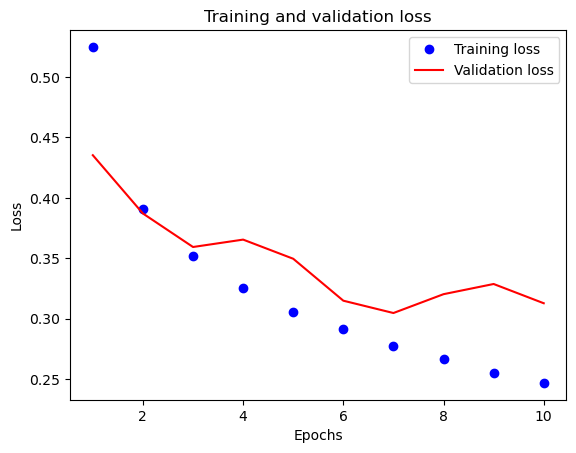

In [16]:
#we verify if we have overfitting or no
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1 )
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

we can see the overfitting start roughly in epoch seven, so we maybe need to reduce the epoch, but also is important to consider the advantages and disadvantages of reducing or increasing the epochs.

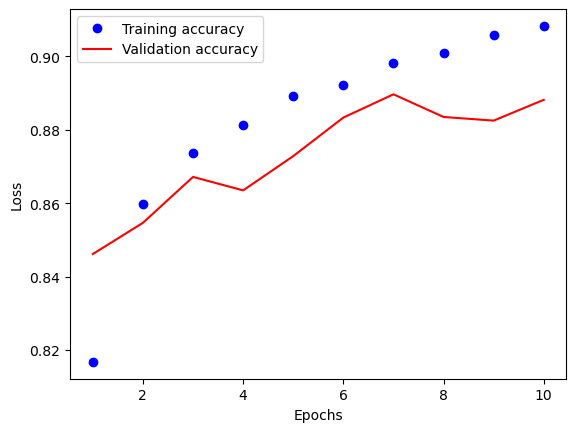

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo',label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**EVALUATE ACCURACY

In [19]:
test_loss, test_acc= model.evaluate(x_test, y_test, verbose=2)
print('test accuracy: ', test_acc)
print('test loss: ', test_loss)

313/313 - 0s - loss: 0.3356 - accuracy: 0.8813 - 468ms/epoch - 1ms/step
test accuracy:  0.8812999725341797
test loss:  0.33558204770088196


**MAKE PREDICTIONS

adding a softmax layer to the model after training it allows the linear outputs to be converted to probabilities, making it easier to interpret the results and make decisions based on the probabilities assigned to each class

In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
predictions[0]

array([2.7138628e-07, 1.5806943e-08, 7.1057177e-10, 1.8658191e-09,
       3.8105890e-07, 1.2470246e-03, 1.2804016e-06, 8.0167723e-04,
       5.4650141e-06, 9.9794382e-01], dtype=float32)

In [23]:
np.max(predictions[0])


0.9979438

Graph this to look at the full set of 10 class predictions.

In [24]:
def plot_image(i,predicitions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predicitions_array)
    #if my prediction is equal that my y_test, so the graph will be painted in green
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],100*np.max(predicitions_array),class_names[true_label]),color= color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


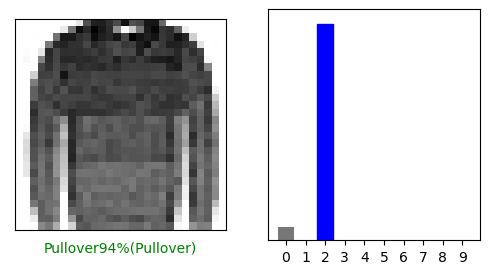

In [25]:
i=20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()


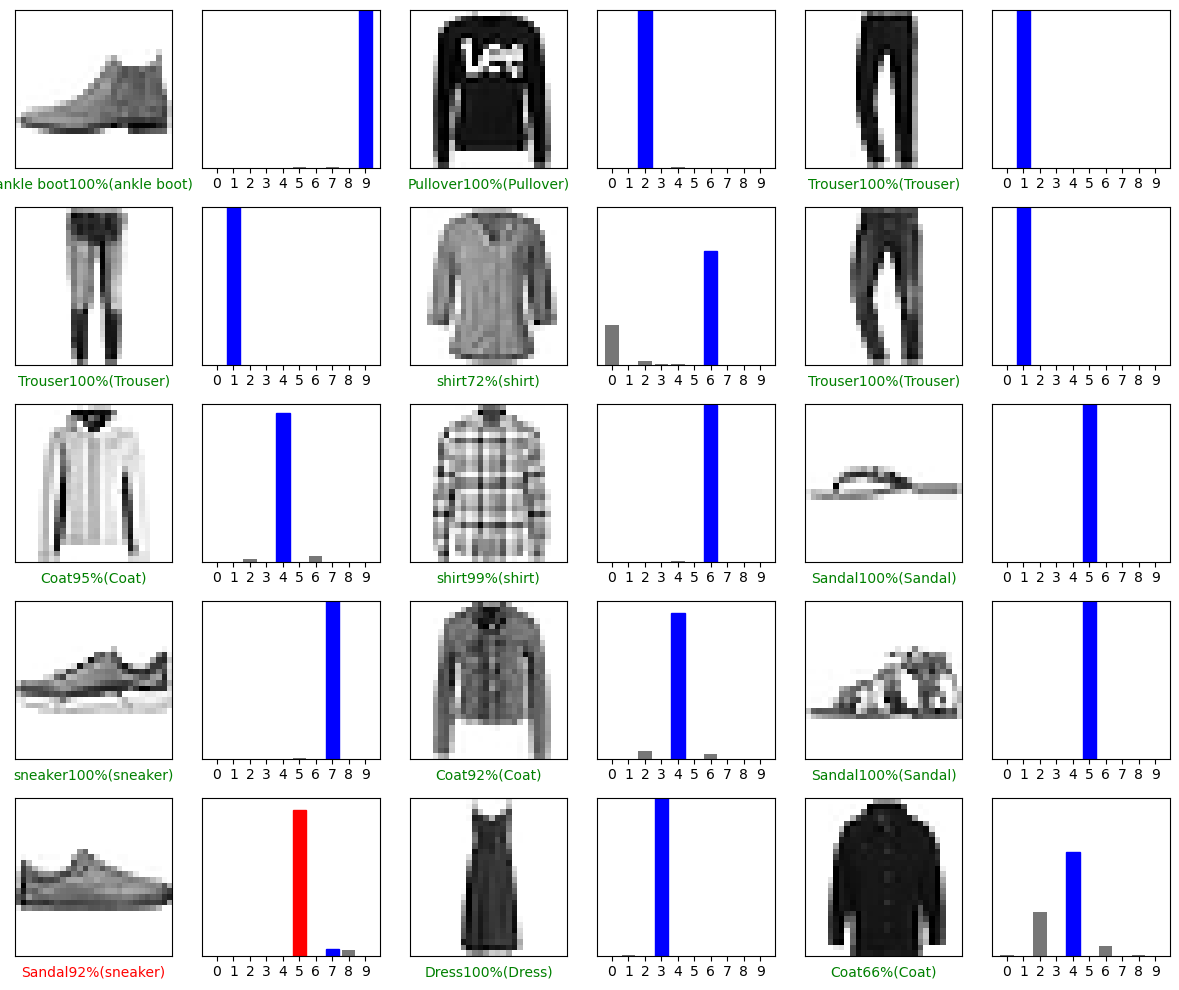

In [26]:
num_rows = 5
num_cols = 3 
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


**HANDLE OVERFITTING

In [32]:
#we use Dropout
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#this layer transform the format of images (28x28=784 pixels)
    tf.keras.layers.Dense(128, activation='relu'),#128 neuronas
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')    
])

In [35]:
model1.compile(optimizer='adam',#adaptive stochastic gradient descent method that adjusts the learning rate based on training progress
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),#sparse categorical cross-entropy, which is a suitable function for multiclass 
              #classification problems with integer labels.
              metrics=['accuracy'])

In [36]:
history1 = model1.fit(partial_x_train, partial_y_train, epochs=10, batch_size =64, validation_data = (x_val, y_val) )

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.2822 - accuracy: 0.8954 - val_loss: 0.3085 - val_accuracy: 0.8873
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.8990 - val_loss: 0.3034 - val_accuracy: 0.8893
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2672 - accuracy: 0.9005 - val_loss: 0.3122 - val_accuracy: 0.8887
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.2631 - accuracy: 0.9008 - val_loss: 0.3102 - val_accuracy: 0.8928
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.2588 - accuracy: 0.9040 - val_loss: 0.2958 - val_accuracy: 0.8895
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2518 - accuracy: 0.9055 - val_loss: 0.3042 - val_accuracy: 0.8898
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.2499 - accuracy: 0.9071 - val_loss: 0.3012 - val_accuracy: 0.8937
Epoch 

In [37]:
history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

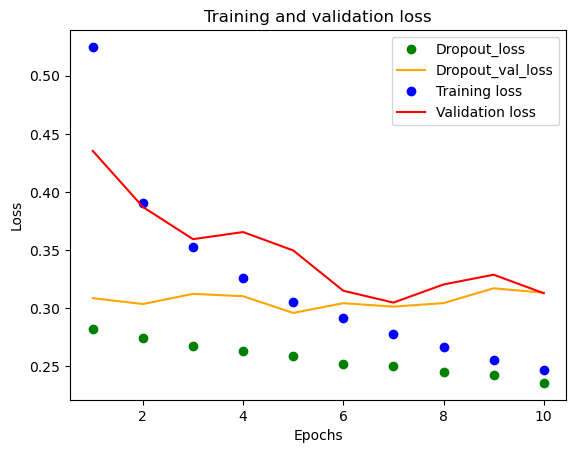

In [38]:
loss = history_dict1['loss']
val_loss = history_dict1['val_loss']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, loss, 'go', label='Dropout_loss')
plt.plot(epochs, val_loss, 'orange', label='Dropout_val_loss')
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
test1_loss, test1_acc= model1.evaluate(x_test, y_test, verbose=2)
print('test accuracy: ', test1_acc)
print('test loss: ', test1_loss)

313/313 - 1s - loss: 0.3351 - accuracy: 0.8883 - 538ms/epoch - 2ms/step
test accuracy:  0.8883000016212463
test loss:  0.3350951075553894


We can see that our test accuracy increased from 0.881 a 0.888 using Dropout

In [40]:
predictions1 = model1.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [41]:
predictions1[0]

array([1.0790172e-07, 4.8003743e-11, 1.4428377e-08, 5.9600133e-08,
       7.9624598e-08, 1.3574732e-03, 1.7119302e-07, 2.9239953e-02,
       1.8762406e-06, 9.6940023e-01], dtype=float32)

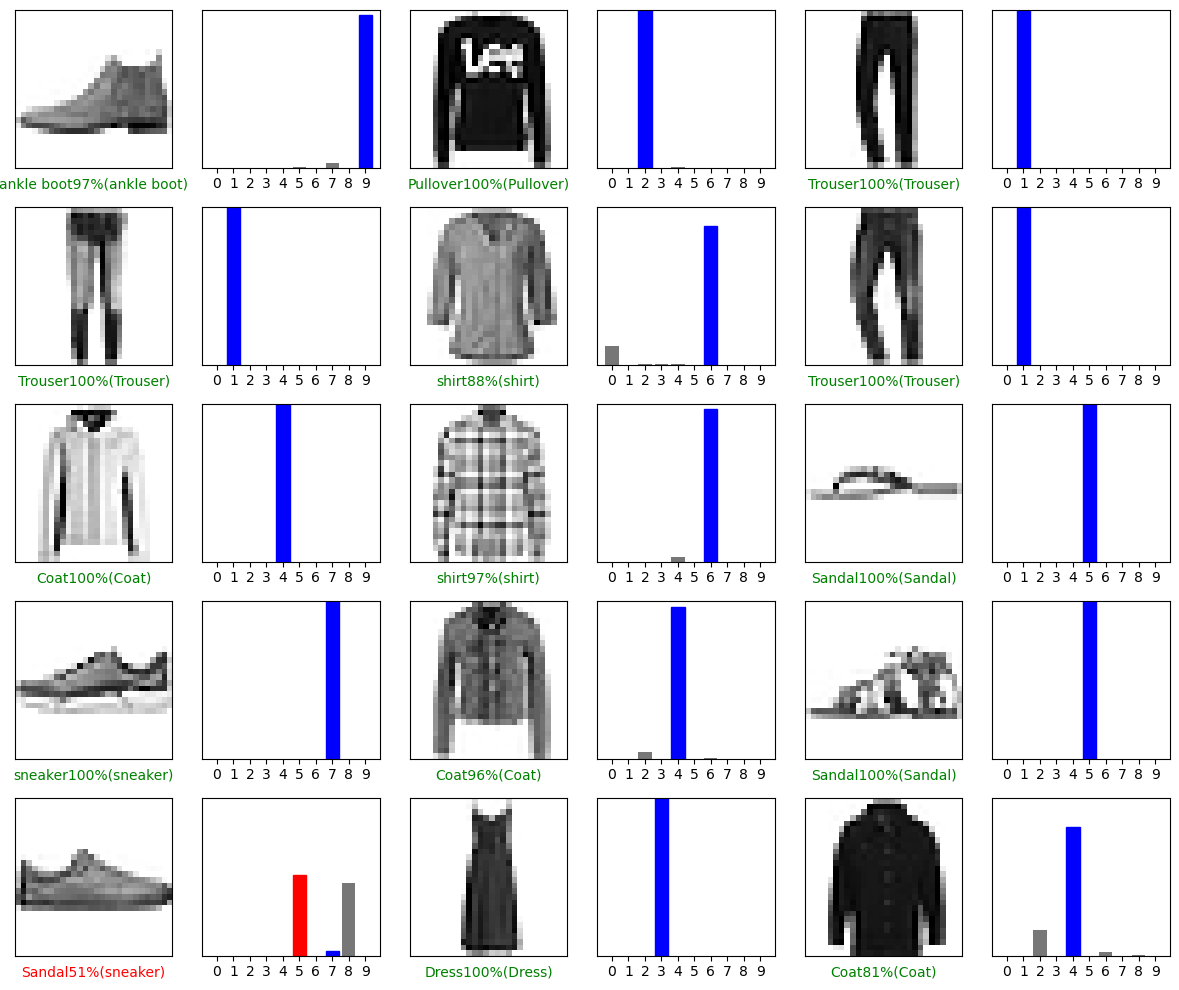

In [42]:
num_rows = 5
num_cols = 3 
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i,predictions1[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions1[i], y_test)
plt.tight_layout()
plt.show()


**USE THE TRAINED MODEL

In [43]:
img = x_test[4]
img.shape

(28, 28)

In [44]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [37]:
predictions_single = probability_model.predict(img)
predictions_single

1/1 [==============================] - 0s 17ms/step


array([[1.5725322e-01, 8.3727605e-04, 1.4031358e-01, 1.8410590e-02,
        1.6476052e-02, 5.3795029e-06, 6.6031194e-01, 1.0108770e-08,
        6.3881446e-03, 3.7482669e-06]], dtype=float32)

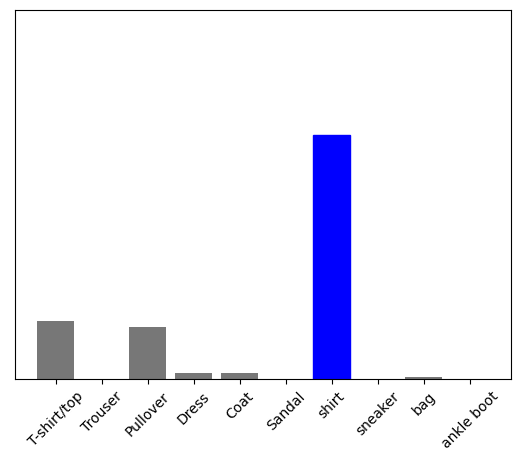

In [39]:
plot_value_array(4, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [45]:
predictions_single1 = model1.predict(img)
predictions_single1

1/1 [==============================] - 0s 24ms/step


array([[1.15793519e-01, 1.42479655e-08, 1.78563816e-03, 1.73028128e-03,
        3.86867835e-03, 5.32021659e-06, 8.76816332e-01, 6.94975100e-08,
        3.90636856e-08, 1.07682752e-07]], dtype=float32)

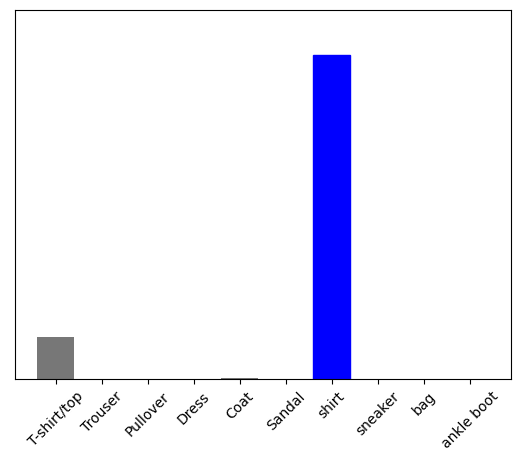

In [46]:
plot_value_array(4, predictions_single1[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()